In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats #had to acceot the term and comditions of the competition

In [0]:
!unzip train.zip
!unzip test1.zip

In [0]:
%matplotlib inline

import pandas as pd
import torch
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import helper
from skimage import io
from PIL import Image

In [54]:
df = pd.read_csv('sampleSubmission.csv')
df.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
dirpath = os.getcwd()

In [0]:
trainpath = Path(dirpath)/'train'
testpath = Path(dirpath)/'test1'
# !ls {testpath}

In [0]:
class DogCatDataset(Dataset):
    def __init__(self, datafolder, transform):
        self.datafolder = datafolder
        self.image_files_list, self.label_list = zip(*[(s,'cat') if s.startswith('cat') 
                                                       else (s,'dog') if s.startswith('dog') 
                                                       else (s,'test') for s in os.listdir(datafolder)])
        self.transform = transform

    def __len__(self):
        return len(self.image_files_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.datafolder,self.image_files_list[idx])
        image = io.imread(img_name)
        image = Image.fromarray(image)
        image = self.transform(image)
        return image, self.label_list[idx]

In [0]:
train_transforms = train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])


train_data = DogCatDataset(str(trainpath), transform=train_transforms)
test_data = DogCatDataset(str(testpath), transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

https://matplotlib.org/users/image_tutorial.html

In [0]:
test_iter = iter(testloader)

In [0]:
train_iter = iter(trainloader)

In [0]:
def show(data_iter,test=True, num=5):

    images, labels = next(data_iter)
    
    def denormalize(image):
#         mean = torch.Tensor([0.485, 0.456, 0.406])
#         std = torch.Tensor([0.229, 0.224, 0.225])
        mean = torch.Tensor([0.5, 0.5, 0.5])
        std = torch.Tensor([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        return image
        
    fig, axes = plt.subplots(figsize=(10,4), ncols=num)
    
    for ii in range(num):
        ax = axes[ii]
        img = images[ii].permute((1, 2, 0))
        
        if not test:
            img = denormalize(img)
            
        ax.imshow(img)
        ax.title.set_text(labels[ii])
        ax.axis('off')

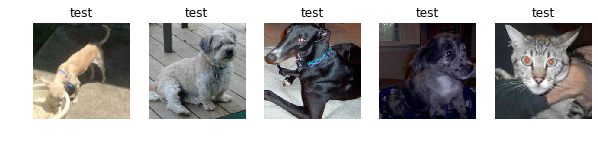

In [203]:
show(test_iter)

View the various transofrmations on the same batch

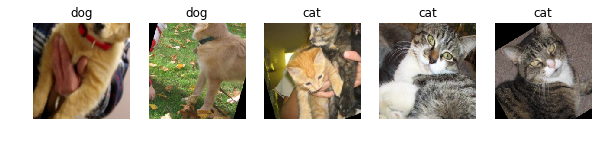

In [208]:
train_iter = iter(trainloader) # to only view the first batch
show(train_iter,test=False)

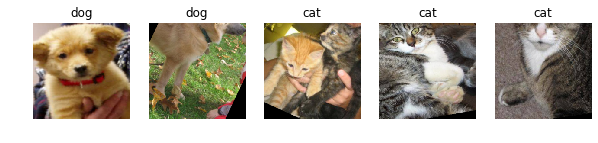

In [209]:
train_iter = iter(trainloader) # to only view the first batch
show(train_iter,test=False)

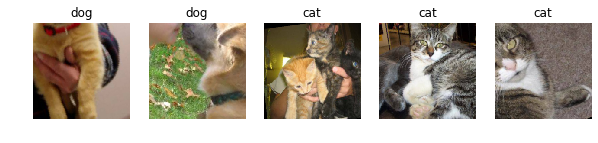

In [210]:
train_iter = iter(trainloader) # to only view the first batch
show(train_iter,test=False)

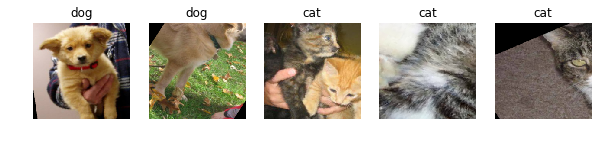

In [211]:
train_iter = iter(trainloader) # to only view the first batch
show(train_iter,test=False)